In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Interpolation using scipy.interpolate.interp1d

In [3]:
from scipy.interpolate import interp1d

In [4]:
def f1(x):
    return -np.exp(-0.25*abs(x))*np.cos(2*x)

lowx = np.linspace(0, 8, 14)
lowy = f1(lowx)

highx = np.linspace(0, 8, 400)  # high defention plot ( lots of points plotted)
highy = f1(highx)

f_inter = interp1d(lowx, lowy) # genreated a function called f_inter that now fills in the points feed to it , interprolating based on low def x 
f_inter = interp1d(lowx, lowy, kind='linear')
intery = f_inter(lowx)

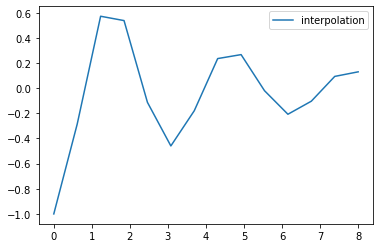

In [5]:
fig1, ax=plt.subplots()
#ax.plot(lowx, lowy, 'o', label='original data')
#ax.plot(highx, highy, '--', label='exact')
ax.plot(lowx, intery, label='interpolation')
ax.legend()
plt.show()


## Minimisation using scipy.optimise.minimize_scalar

In [6]:
from scipy.optimize import minimize_scalar

In [7]:
f1min=minimize_scalar(f1) # creat an object to store out puts of miniize_scalar . Which is acting on f1 here 
print(f1min.x, f1min.fun, sep=',')
f1min.items()

0.0,-1.0


dict_items([('fun', -1.0), ('x', 0.0), ('nit', 27), ('nfev', 31), ('success', True)])

In [8]:
# inappropriate bracketing can result in finding local minimum only
f1minb=minimize_scalar(f1, bracket=(4,5))
print(f1minb.x, f1minb.fun, sep=',')

3.0794151453513634,-0.4595048040237752


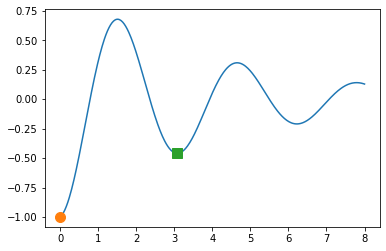

In [9]:
fig2, ax = plt.subplots()
ax.plot(highx, highy)
ax.plot(f1min.x, f1min.fun, 'o', ms=10)
ax.plot(f1minb.x, f1minb.fun, 's', ms=10)
plt.show()

## Least square fitting with scipy.optimize.leastsq

We will try to fit something of the form $A e^{- B x} \cos(C x)$ 

In [10]:
from scipy.optimize import leastsq

In [12]:
#the function we want to use in our fitting
def fun_to_fit(x, A, B, C):
    return A * np.exp(-B*x)*np.cos(C*x)

#define the residuals function (difference between model and data)
def residuals(p, y, x):
    A, B, C = p
    return y - fun_to_fit(x, A, B, C)

#First, we generate some suitable data and add some random noise
A, B, C = 8, 4, 23
x=np.linspace(0, 1, 101)
y_exact =  fun_to_fit(x, A, B, C)
y_to_fit = y_exact + 0.5*np.random.randn(len(y_exact))    #randn draws from a normal distribution

#first guess 
p0 = 1, 2, 3
fitting = leastsq(residuals, p0, args=(y_to_fit, x))

y_fitted= fun_to_fit(x, fitting[0][0], fitting[0][1], fitting[0][2])
print(fitting[0])
print(fitting[1])
fitting


[ 8.10974116  4.23581533 23.13278528]
1


(array([ 8.10974116,  4.23581533, 23.13278528]), 1)

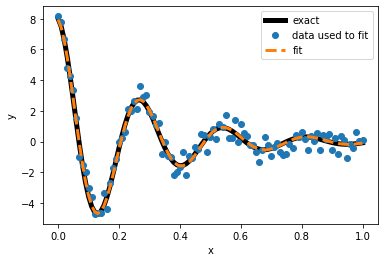

In [58]:


fig3, ax = plt.subplots()
ax.plot(x, y_exact, 'k', linewidth=5, label='exact')
ax.plot(x, y_to_fit, 'o', label='data used to fit')
ax.plot(x, y_fitted, '--', linewidth=3, label='fit')
ax.legend()
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.show()

## Root finding

In [54]:
from scipy.optimize import brentq

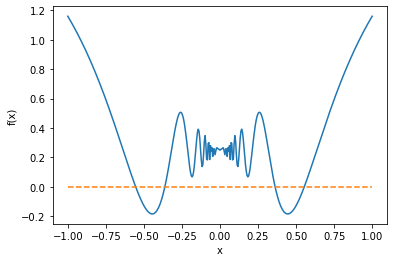

In [55]:
f = lambda x:  1/4 + x*np.sin(2/x)

fig4, ax = plt.subplots()
xs = np.linspace(-1, 1, 400)
ax.plot(xs, f(xs))
ax.plot(xs, np.zeros_like(xs), '--')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
plt.show()

Let's try and find the root between 0.5 and 0.7:

In [56]:
root=brentq(f, 0.5, 0.7)
print(root)
print(f(root))

0.5540597733997454
5.179190409876355e-14
